In [1]:
# reading data
## Example with GridSearch CV
#https://stackoverflow.com/questions/38555650/try-multiple-estimator-in-one-grid-search/53292354
import csv
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import f1_score, make_scorer, classification_report
import pandas as pd
from sklearn.metrics import classification_report

In [2]:
path = 'hatespeech_text_label_vote_RESTRICTED_100K.csv'
!head hatespeech_text_label_vote_RESTRICTED_100K.csv
#tweet, label, number of voters

Beats by Dr. Dre urBeats Wired In-Ear Headphones - White https://t.co/9tREpqfyW4 https://t.co/FCaWyWRbpE	spam	4
RT @Papapishu: Man it would fucking rule if we had a party that was against perpetual warfare.	abusive	4
It is time to draw close to Him &#128591;&#127995; Father, I draw near to you now and always ❤️ https://t.co/MVRBBX2aqJ	normal	4
if you notice me start to act different or distant.. it's bc i peeped something you did or i notice a difference in how you act &amp; ian fw it.	normal	5
Forget unfollowers, I believe in growing. 7 new followers in the last day! Stats via https://t.co/bunPHQNXhj	normal	3
RT @Vitiligoprince: Hate Being sexually Frustrated Like I wanna Fuck But ion wanna Just fuck anybody	abusive	4
Topped the group in TGP Disc Jam Season 2! Onto the Semi-Finals! @HighHorseGames https://t.co/N7LE8lX7Rm	normal	3
That daily baby aspirin for your #heart just might be preventing colon #cancer too. https://t.co/2TLawmHhEe	normal	5
I liked a @YouTube video from @mattshea 

In [3]:
tweets = []
labels = []
with open(path) as fi:
    data = csv.reader(fi, delimiter='\t')
    for row in data:
        tweets.append(row[0])
        labels.append(row[1]) 

In [4]:
## sanity checks
len(tweets) == len(labels)
print(len(tweets))

99996


In [5]:
Counter(labels)

Counter({'spam': 14030, 'abusive': 27150, 'normal': 53851, 'hateful': 4965})

<BarContainer object of 4 artists>

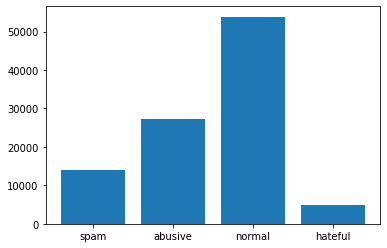

In [6]:
plt.bar(Counter(labels).keys(), Counter(labels).values())

In [21]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)


In [22]:
pipeline = Pipeline(steps = [('vectorizer', TfidfVectorizer()), ('classifier', LogisticRegression(solver='liblinear'))])

grid = {
    'vectorizer__ngram_range' : [(1,1), (1,2)],
    'vectorizer__max_df': [0.5, 1.0],
    'vectorizer__min_df': [0, 5],
    'classifier__C': [0.01, 1, 100]
}

f1 = make_scorer(f1_score, average='macro') # macro --> emphasizes the prediction of the smaller classes (in this case: hateful/ spam)

search = GridSearchCV(estimator=pipeline,
                      param_grid=grid,
                      scoring=f1, 
                      cv=3,
                      n_jobs=-1,  # use all cpus
                      verbose=10)
                      
search.fit(X_train, y_train)

print(f'Using these hyperparameters {search.best_params_}, we get the best performance:')


Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2; 1/24] START classifier__C=0.01, vectorizer__max_df=0.5, vectorizer__min_df=0, vectorizer__ngram_range=(1, 1)
[CV 2/2; 1/24] START classifier__C=0.01, vectorizer__max_df=0.5, vectorizer__min_df=0, vectorizer__ngram_range=(1, 1)
[CV 1/2; 2/24] START classifier__C=0.01, vectorizer__max_df=0.5, vectorizer__min_df=0, vectorizer__ngram_range=(1, 2)
[CV 2/2; 2/24] START classifier__C=0.01, vectorizer__max_df=0.5, vectorizer__min_df=0, vectorizer__ngram_range=(1, 2)
[CV 1/2; 3/24] START classifier__C=0.01, vectorizer__max_df=0.5, vectorizer__min_df=5, vectorizer__ngram_range=(1, 1)
[CV 2/2; 3/24] START classifier__C=0.01, vectorizer__max_df=0.5, vectorizer__min_df=5, vectorizer__ngram_range=(1, 1)
[CV 1/2; 4/24] START classifier__C=0.01, vectorizer__max_df=0.5, vectorizer__min_df=5, vectorizer__ngram_range=(1, 2)
[CV 2/2; 4/24] START classifier__C=0.01, vectorizer__max_df=0.5, vectorizer__min_df=5, vectorizer__ngram_range=(1

In [ ]:
print(classification_report(X_test, search.predict(y_test)))